# **MÓDULO 42 - Introducción a Machine Learning II**

En este módulo, nos centraremos en la preparación y evaluación de modelos de Machine Learning, abordando aspectos críticos del análisis de datos y la construcción de modelos predicitivos. Exploraremos la importancia de una preparación meticulosa y un análisis exploratorio exhaustivo antes de desarrollar modelos de Machine Learning.

### **Prepración de Datos**

Aprenderemos técnicas de imputación de datos como Hot Deck, Cold Deck, media, moda y regresión. Discutiremos la importancia de elegir la técnica adecuada según el contexto y la relevancia de consultar con el negocio sobre las variables con valores nulos. 

### **Análisis Bivariado**

Exploraremos cómo las variables se comportan en relación con otras, utilizando herramientas como crosstab y grouby. La normalización de datos y la visualización de resultados serán esenciales para obtener insights sobre el comportamiento de diferentes grupos dentro del dataset.

### **Evaluación de Modelos**

Discutiremos las métricas de evaluación de modelos, como la matriz de confusión, el accuracy, la precisión, el recall, y el F1 Score. También exploraremos la curva de ROC y su relevancia en aplicaciones específicas como las médicas.
_____

In [9]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\48_Módulo_42_Introducción_Machine_Learnin_II\Introduccion_Machine_Learning_II')


In [12]:
df = pd.read_csv(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\48_Módulo_42_Introducción_Machine_Learnin_II\Introduccion_Machine_Learning_II\marketing_campaign.csv', sep=';')

In [13]:
df.sample(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
117,367,1978,2n Cycle,Married,36550.0,1,0,2013-02-19,74,47,...,9,0,0,0,0,0,0,3,11,0
549,2256,1973,Master,Married,27159.0,1,1,2014-03-29,33,17,...,6,0,0,0,0,0,0,3,11,0
594,3075,1972,PhD,Married,59973.0,0,0,2013-09-11,47,130,...,1,0,0,0,0,0,0,3,11,0
915,9308,1954,Graduation,Married,62820.0,0,0,2013-05-11,51,398,...,1,0,0,0,0,0,0,3,11,0


In [14]:
df.shape

(2240, 29)

# **Field Engineering**

- Eliminar las columnas ID, Z_CostContact y Z_Revenue.
- Estas columnas no aportan nada al modelo de ML pues tienen un ID de seguimiento o solo tienen un valor.

In [15]:
df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)

In [16]:
df.shape

(2240, 26)

In [17]:
df.nunique()

Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

In [19]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

**Insight** - La columna Income es la que tiene el problema de nulos.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


In [23]:
df.nunique().sort_values(ascending=False)

Income                 1974
MntWines                776
Dt_Customer             663
MntMeatProducts         558
MntGoldProds            213
MntFishProducts         182
MntSweetProducts        177
MntFruits               158
Recency                 100
Year_Birth               59
NumWebVisitsMonth        16
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
Marital_Status            8
Education                 5
Teenhome                  3
Kidhome                   3
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

**Insights**

- Se debe imputar un valor a las celdas Income del dataset que tienen NaN como valor. Se debería preguntar al negocio si esta variable es crucial, ya que tal vez podrían eliminarse. Se asume, para el caso, que se puede imputar el promedio total del income del dataset.

In [28]:
print(f'Mediana de Income:, {df['Income'].median():.2f}')
print(f'Media de Income: {df['Income'].mean():.2f}')

Mediana de Income:, 51381.50
Media de Income: 52247.25


In [29]:
df.mode(axis='rows', numeric_only=True).T

,0
Year_Birth,1976.0
Income,7500.0
Kidhome,0.0
Teenhome,0.0
Recency,56.0
MntWines,2.0
MntFruits,0.0
MntMeatProducts,7.0
MntFishProducts,0.0
MntSweetProducts,0.0


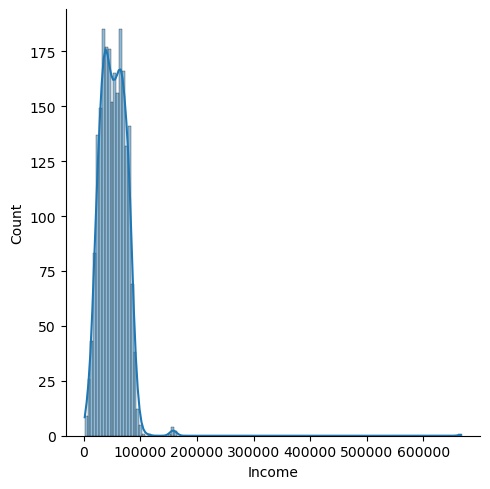

In [31]:
sns.displot(df['Income'], kde=True)

In [33]:
acv_mean = df['Income'].mean()
df = df.replace(np.nan, acv_mean)

In [34]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

_____

# **Visualización Básica**

**Análisis Univariado**

In [35]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object

In [42]:
print(' Lista completa de columnas:')
print('________________________')
print(df.columns)
print(len(df.columns), ' columnas')

 Lista completa de columnas:
________________________
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')
26  columnas


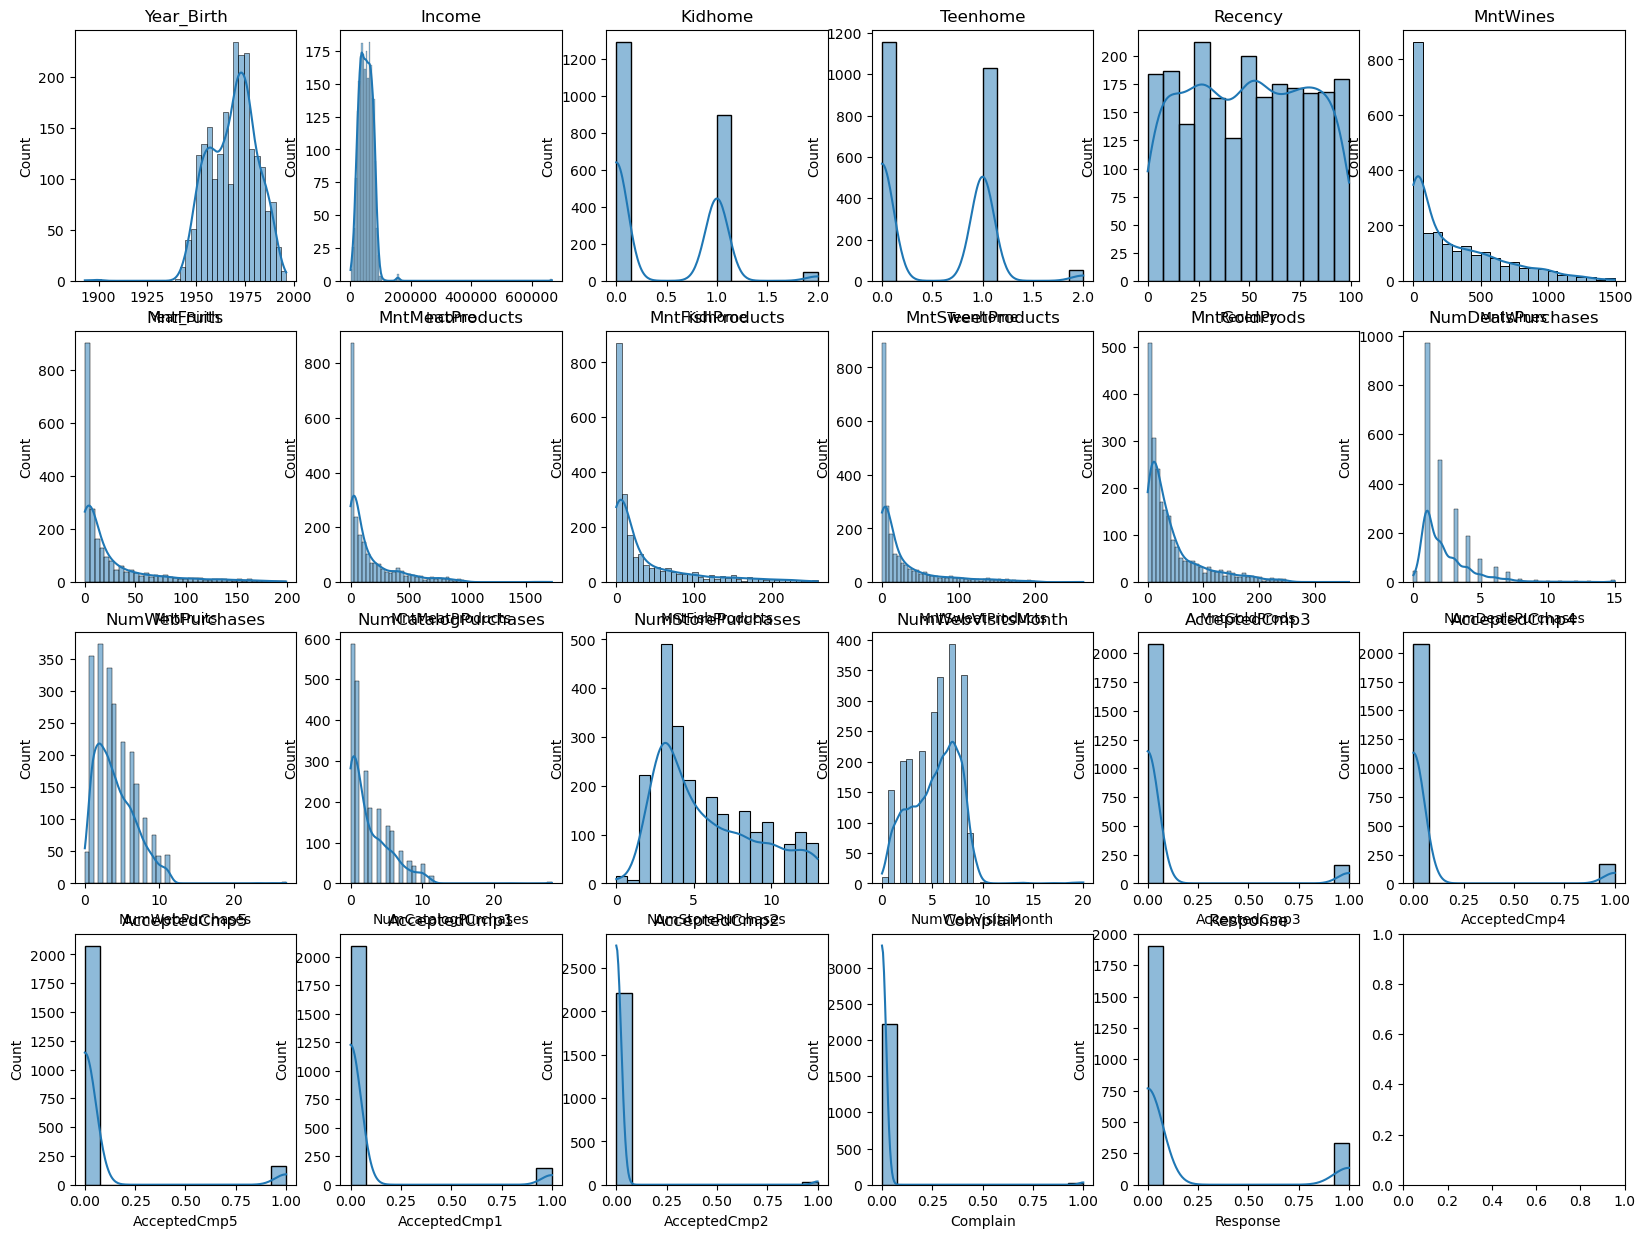

In [43]:
fig, axes = plt.subplots(4, 6, figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    sns.histplot(df[col], kde=True, ax=axes[i//6, i%6])
    axes[i//6, i%6].set_title(col)

### **Insights**

- Los campos MntWines, MntFruits, Mnt en general tienen un sesgo importante hacia la derecha. Para los modelos de ML eso no ayuda en el proceso, por lo que deberíamos generar campos adicionales con su logaritmo.
- Así mismo, la clade de respuesta final 'Response', se ve desbalanceada.

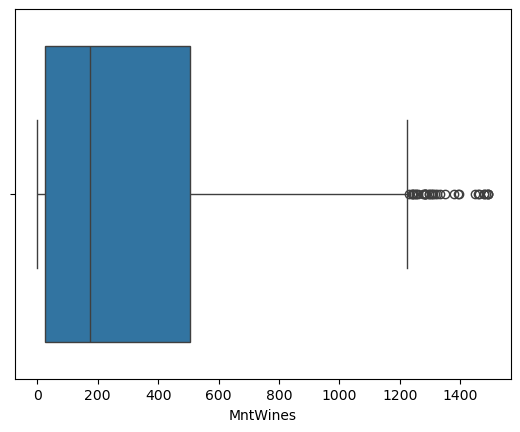

In [45]:
ax = sns.boxplot(x = df['MntWines'])

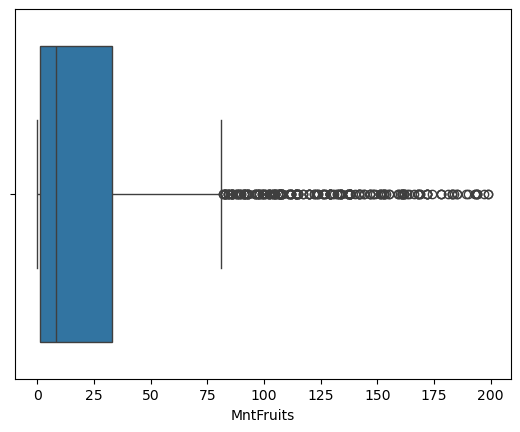

In [46]:
ax = sns.boxplot(x = df['MntFruits'])

### **Otras formas de generar la matriz de correlación**

- También se hace análisis de correlación para validar variables que tengan datos no compatibles. 
- Para encontrar variables que tengan relaciones muy altas unas con otras (>90), lo que las hace sospechosas de ser causales, es decir que una causa la otra. 

In [67]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.corr().round(2)


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Year_Birth,1.00,-0.16,0.23,-0.35,-0.02,-0.16,-0.02,-0.03,-0.04,-0.02,...,-0.12,-0.13,0.12,0.06,-0.06,0.01,-0.01,-0.01,-0.03,0.02
Income,-0.16,1.00,-0.43,0.02,-0.00,0.58,0.43,0.58,0.44,0.44,...,0.59,0.53,-0.55,-0.02,0.18,0.33,0.27,0.09,-0.03,0.13
Kidhome,0.23,-0.43,1.00,-0.04,0.01,-0.50,-0.37,-0.44,-0.39,-0.37,...,-0.50,-0.50,0.45,0.01,-0.16,-0.21,-0.17,-0.08,0.04,-0.08
Teenhome,-0.35,0.02,-0.04,1.00,0.02,0.00,-0.18,-0.26,-0.20,-0.16,...,-0.11,0.05,0.13,-0.04,0.04,-0.19,-0.14,-0.02,0.00,-0.15
Recency,-0.02,-0.00,0.01,0.02,1.00,0.02,-0.00,0.02,0.00,0.02,...,0.03,0.00,-0.02,-0.03,0.02,0.00,-0.02,-0.00,0.01,-0.20
MntWines,-0.16,0.58,-0.50,0.00,0.02,1.00,0.39,0.56,0.40,0.39,...,0.64,0.64,-0.32,0.06,0.37,0.47,0.35,0.21,-0.04,0.25
MntFruits,-0.02,0.43,-0.37,-0.18,-0.00,0.39,1.00,0.54,0.59,0.57,...,0.49,0.46,-0.42,0.01,0.01,0.22,0.19,-0.01,-0.01,0.13
MntMeatProducts,-0.03,0.58,-0.44,-0.26,0.02,0.56,0.54,1.00,0.57,0.52,...,0.72,0.48,-0.54,0.02,0.10,0.37,0.31,0.04,-0.02,0.24
MntFishProducts,-0.04,0.44,-0.39,-0.20,0.00,0.40,0.59,0.57,1.00,0.58,...,0.53,0.46,-0.45,0.00,0.02,0.20,0.26,0.00,-0.02,0.11
MntSweetProducts,-0.02,0.44,-0.37,-0.16,0.02,0.39,0.57,0.52,0.58,1.00,...,0.49,0.45,-0.42,0.00,0.03,0.26,0.24,0.01,-0.02,0.12


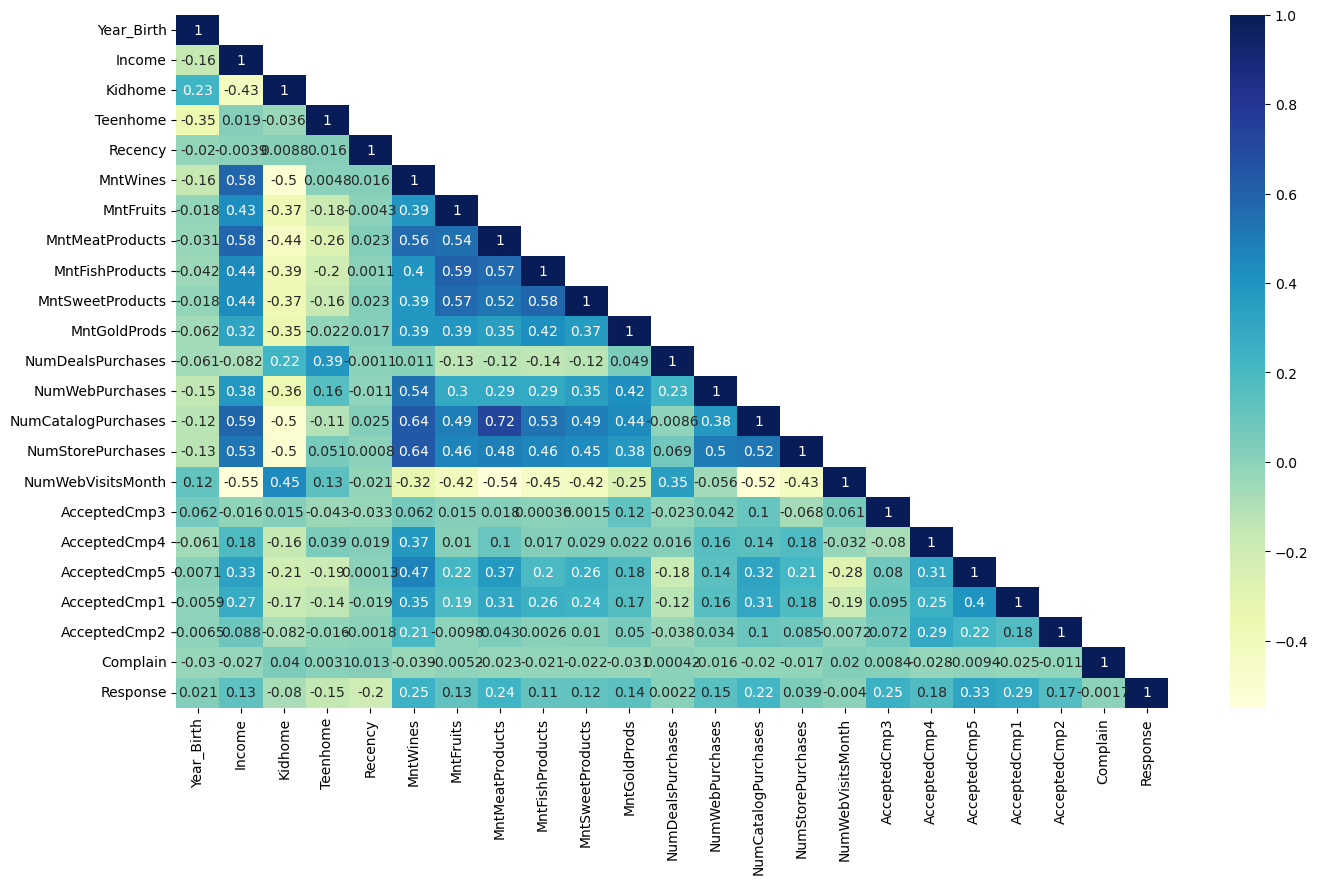

In [61]:

plt.figure(figsize=(16, 9))

corr_df = df_numeric.corr(method='pearson')

# Crear máscara triangular inferior
mask = np.tril(np.ones(corr_df.shape), k=0).astype(bool)

# Aplicar máscara
df_lt = corr_df.where(mask)

# Graficar
sns.heatmap(df_lt, cmap='YlGnBu', annot=True)
plt.show()

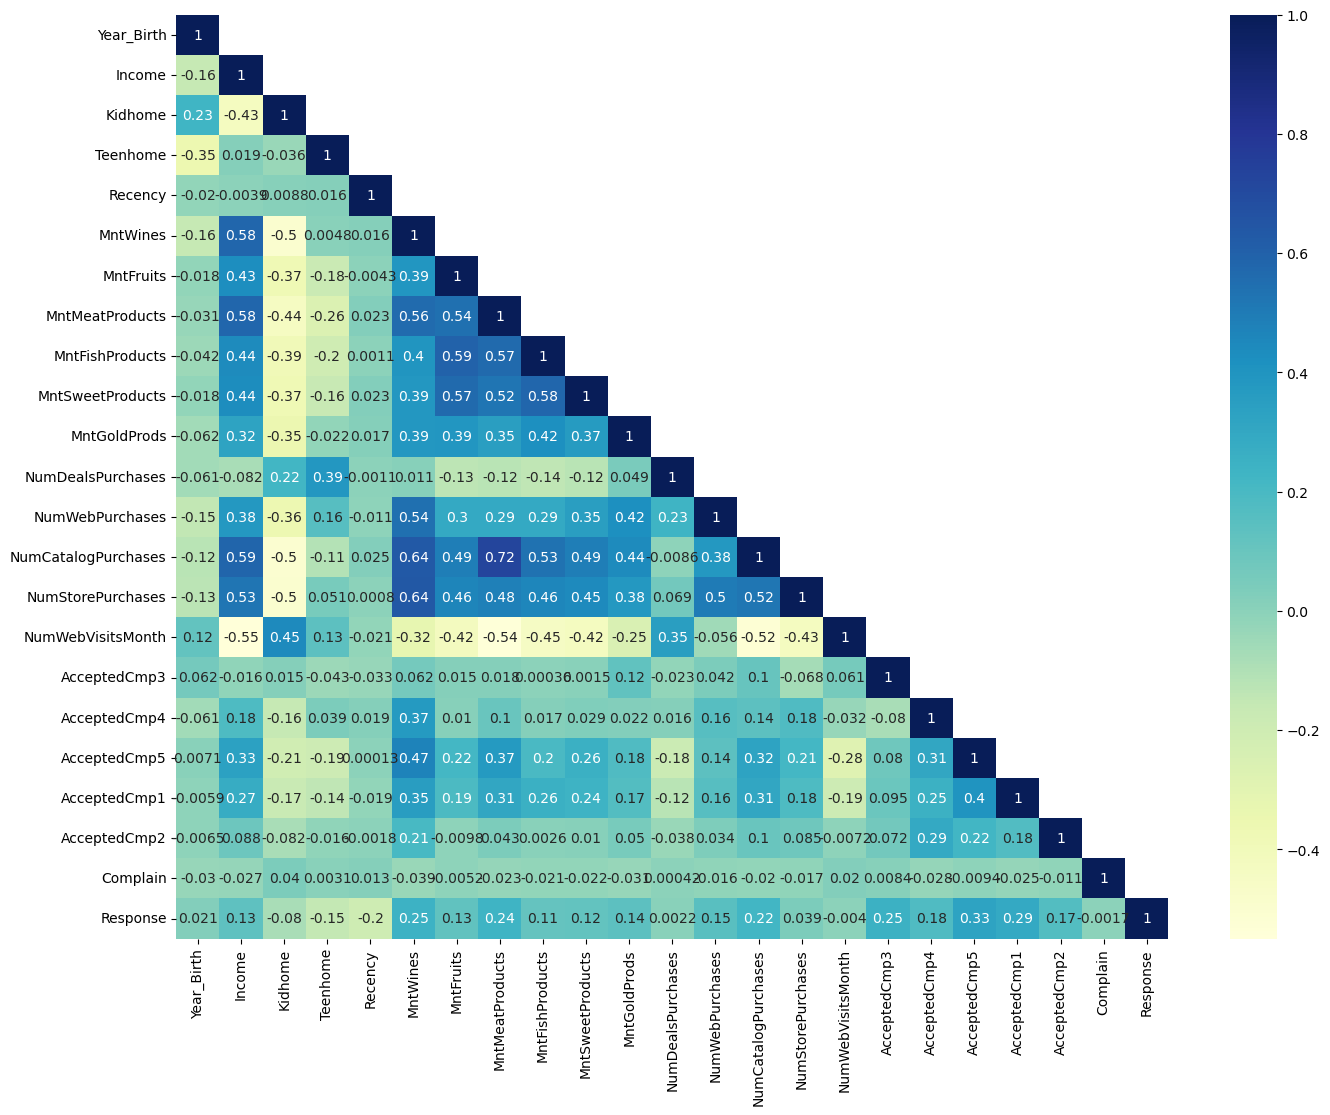

In [63]:
plt.figure(figsize=(16, 12))

corr_df = df_numeric.corr(method='pearson')

# Crear máscara para ocultar la parte superior
mask = np.triu(np.ones(corr_df.shape), k=1)

# Graficar heatmap con máscara
sns.heatmap(corr_df, mask=mask, cmap='YlGnBu', annot=True)
plt.show()

### **Insights**

- No se encuentra ninguna variable que deba ser eliminada por alta correlación
_____

# **Análisis Bivariado**

Consiste en ver cómo se comportan todas las variables con una variable en particular. Por ejemplo, vamos a ver cómo se comportan todas las variables con la variable de estado civil.

In [82]:
def grafica_corr(x):
    return df.groupby(x)[df.select_dtypes(include='number').columns].mean().round(2).T

In [91]:
x = 'Marital_Status'
grafica_corr(x)

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Year_Birth,1975.0,1973.00,1966.28,1969.58,1971.49,1967.75,1958.56,1973.0
Income,72365.5,43789.00,52834.23,51729.21,51018.82,53233.49,56426.56,48432.0
Kidhome,0.0,1.00,0.41,0.46,0.46,0.45,0.23,0.0
Teenhome,0.0,0.67,0.59,0.51,0.41,0.53,0.64,1.0
Recency,53.0,30.33,49.49,48.28,49.51,50.11,49.14,3.0
MntWines,355.5,184.67,324.84,299.48,288.33,306.83,369.27,322.0
MntFruits,84.5,4.00,27.43,25.73,26.84,25.35,33.09,3.0
MntMeatProducts,312.5,26.33,150.21,160.68,182.11,168.10,189.29,50.0
MntFishProducts,205.5,7.67,35.04,35.38,38.22,38.99,51.39,4.0
MntSweetProducts,30.5,7.00,26.82,26.70,27.26,26.12,39.01,3.0


In [85]:
x = 'Response'
grafica_corr(x)

Response,0,1
Year_Birth,1968.70,1969.42
Income,50856.12,60185.84
Kidhome,0.46,0.34
Teenhome,0.54,0.31
Recency,51.51,35.38
MntWines,269.10,502.70
MntFruits,24.22,38.20
MntMeatProducts,144.62,294.35
MntFishProducts,34.98,52.05
MntSweetProducts,25.04,38.63


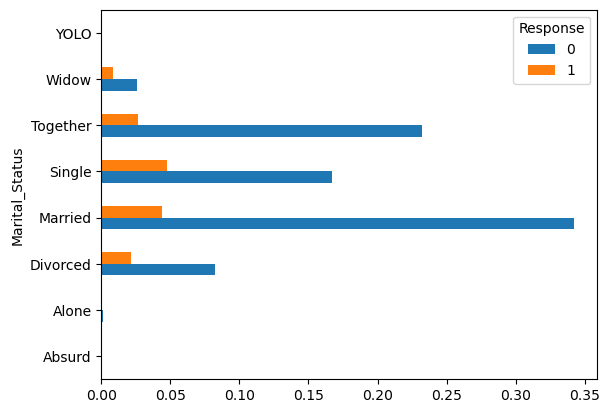

In [94]:
ct = pd.crosstab(df['Marital_Status'], df['Response'], normalize=True).plot.barh(stacked=False)
